## B2) +1) Most common style per country mapped:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

artists=pd.read_csv('../datasets/artists.csv')
wikiart = pd.read_csv('../datasets/wikiart_artists_styles_grouped.csv')

In [2]:
nationality_mapping = {
    'French': 'France',
    'German': 'Germany',
    'Dutch': 'Netherlands',
    'Italian': 'Italy',
    'Spanish': 'Spain',
    'British': 'United Kingdom',
    'Portuguese': 'Portugal',
    'Swiss': 'Switzerland',
    'Swedish': 'Sweden',
    'Norwegian': 'Norway',
    'Danish': 'Denmark',
    'Finnish': 'Finland',
    'Greek': 'Greece',
    'Belgian': 'Belgium',
    'Austrian': 'Austria',
    'Polish': 'Poland',
    'Czech': 'Czechia',
    'Hungarian': 'Hungary',
    'Romanian': 'Romania',
    'Bulgarian': 'Bulgaria',
    'Croatian': 'Croatia',
    'Serbian': 'Serbia',
    'Slovak': 'Slovakia',
    'Slovenian': 'Slovenia',
    'Bosnian': 'Bosnia and Herz.',
    'Montenegrin': 'Montenegro',
    'Macedonian': 'North Macedonia',
    'Belarusian': 'Belarus',
    'Latvian': 'Latvia',
    'Lithuanian': 'Lithuania',
    'Estonian': 'Estonia',
    'Albanian': 'Albania',
    'Kosovar': 'Kosovo',
    'Turkish': 'Turkey',
    'Icelandic': 'Iceland',
    'Irish': 'Ireland',
    'Scottish': 'Scotland',
    'Welsh': 'Wales',
    'American': 'United States',
    'Russian': 'Russia',
    'Ukrainian': 'Ukraine',
    'Chinese': 'China',
    'Japanese': 'Japan',
    # Add more as needed
}

In [3]:
def map_nationalities(nationality_str):
    if type(nationality_str)==float:
        return np.nan
    nationalities = nationality_str.split(',')
    countries = [nationality_mapping.get(nat.strip(), nat.strip()) for nat in nationalities]
    return ', '.join(countries)

artists['Country'] = artists['Nationality'].apply(map_nationalities)

In [4]:
#Remove artists from the WikiArt dataset that are not in the PainterPalette dataset
wikiart = wikiart[wikiart['artist'].isin(artists['artist'])].reset_index(drop=True)
#For each row, search the artist in the artists dataset and get the country
wikiart['Countries'] = wikiart['artist'].apply(lambda x: artists[artists['artist']==x]['Country'].iloc[0] if x in artists['artist'].values else np.nan)
wikiart = wikiart[wikiart['style']!="Unknown"].reset_index(drop=True)
wikiart

,style,artist,movement,count,Countries
0,Abstract Art,Ad Reinhardt,Abstract Expressionism,15,United States
1,Abstract Art,Adnan Coker,Abstract Art,25,Turkey
2,Abstract Art,Akkitham Narayanan,Abstract Art,17,Indian
3,Abstract Art,Alberto Magnelli,Abstract Art,19,"Italy, France"
4,Abstract Art,Alekos Kontopoulos,Social Realism,26,Greece
...,...,...,...,...,...
5294,Verism,Julius Bissier,Art Informel,4,Germany
5295,Verism,Max Beckmann,Expressionism,6,Germany
5296,Yoruba,Olowe of Ise,Native Art,13,NaN
5297,Zen,Jiro Yoshihara,Art Informel,2,Japan


In [5]:
plotted_countries= ['France',
    'Germany',
    'Netherlands',
    'Italy',
    'Spain',
    'United Kingdom',
    'Portugal',
    'Switzerland',
    'Sweden',
    'Norway',
    'Denmark',
    'Finland',
    'Greece',
    'Belgium',
    'Austria',
    'Poland',
    'Czechia',
    'Hungary',
    'Romania',
    'Bulgaria',
    'Croatia',
    'Serbia',
    'Slovakia',
    'Slovenia',
    'North Macedonia',
    'Latvia',
    'Lithuania',
    'Iceland',
    'Ireland',
    'Russia',
    'Ukraine',
]

In [6]:
#Wikiart: for each country, get the most common style
most_popular_styles = wikiart.groupby('Countries')['style'].agg(lambda x: x.mode().iloc[0] if not x.empty else None).reset_index()
#Drop country if it is not in the nationality_mapping dictionary
most_popular_styles= most_popular_styles[most_popular_styles['Countries'].isin(plotted_countries)]
most_popular_styles['style'].value_counts()

style
Impressionism              10
Expressionism               7
Art Nouveau (Modern)        2
Abstract Art                2
Realism                     2
Surrealism                  2
High Renaissance            1
Constructivism              1
Baroque                     1
Naïve Art (Primitivism)     1
Socialist Realism           1
Romanticism                 1
Name: count, dtype: int64

Colors:

C:\Users\hanic\AppData\Local\Temp\ipykernel_4752\4152264459.py:25: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


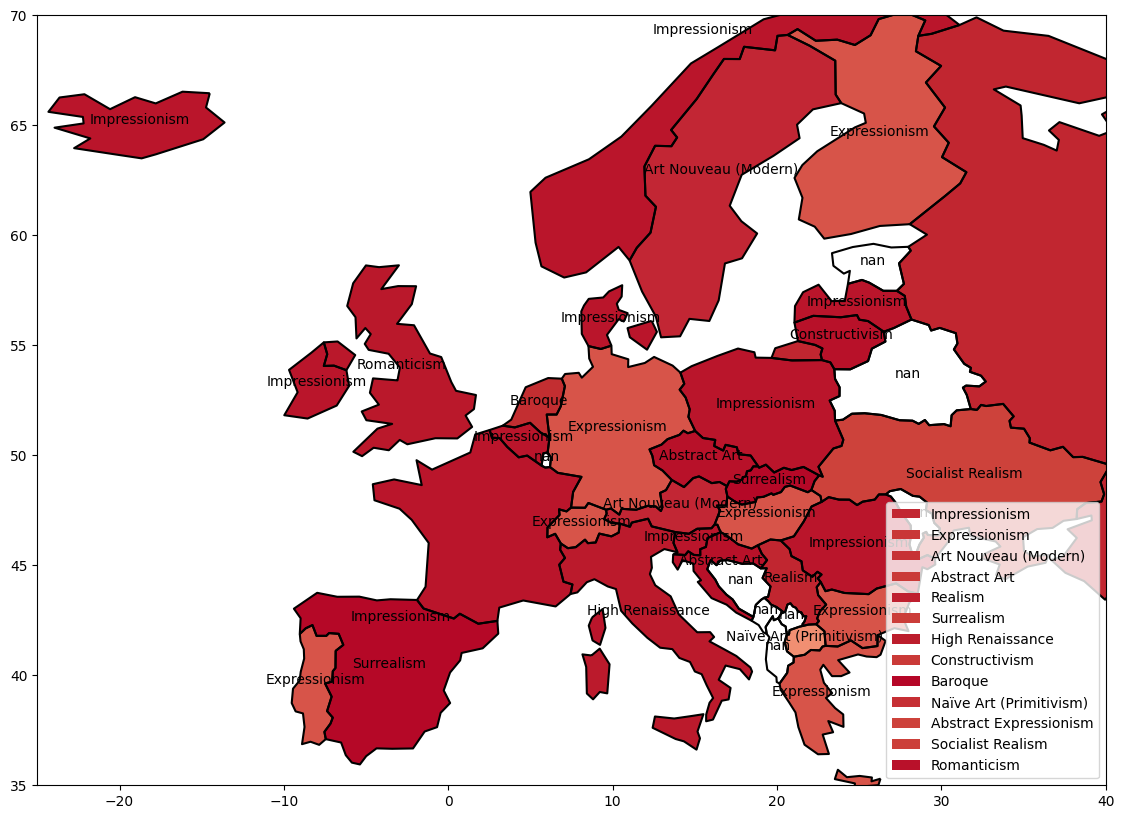

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

style_age = {
    'Impressionism': 1860,
    'Expressionism': 1905,
    'Art Nouveau (Modern)': 1890,
    'Abstract Art': 1910,
    'Realism': 1840,
    'Surrealism': 1920,
    'High Renaissance': 1490,
    'Constructivism': 1913,
    'Baroque': 1600,
    'Naïve Art (Primitivism)': 1880,
    'Abstract Expressionism': 1940,
    'Socialist Realism': 1930,
    'Romanticism': 1800
}

# Create a more colorful colormap based on style_age
cmap = LinearSegmentedColormap.from_list("StyleAge", [plt.cm.coolwarm(age / max(style_age.values())) for style, age in style_age.items()])

# Assuming you have a world shapefile named 'world.shp'
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for only European countries
europe = world[(world['continent'] == 'Europe')]

# Merge Europe data with most_popular_styles
europe = europe.merge(most_popular_styles, how='left', left_on='name', right_on='Countries')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the boundaries
europe.boundary.plot(ax=ax, color='black')

# Plot the countries, colored by style
europe['style_color'] = europe['style'].map({style: cmap(age / max(style_age.values())) for style, age in style_age.items()})
europe.plot(column='style_color', ax=ax, legend=True, cmap=cmap)

# Annotate the countries with their style
europe.apply(lambda x: ax.annotate(text=x.style, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

# Set x and y limits to zoom in on Europe
ax.set_xlim(-25, 40)
ax.set_ylim(35, 70)

# Create a custom legend
handles = []
labels = []
for style, age in style_age.items():
    handles.append(plt.Rectangle((0, 0), 1, 1, fc=cmap(age / max(style_age.values()))))
    labels.append(style)
ax.legend(handles, labels, loc='lower right')

plt.show()


In [8]:
style_color = {
    'Impressionism': 'red',
    'Expressionism': 'orange',
    'Art Nouveau (Modern)': 'yellow',
    'Abstract Art': 'green',
    'Realism': 'blue',
    'Surrealism': 'purple',
    'High Renaissance': 'pink',
    'Constructivism': 'brown',
    'Baroque': 'olive',
    'Naïve Art (Primitivism)': 'cyan',
    'Abstract Expressionism': 'magenta',
    'Socialist Realism': 'gray',
    'Romanticism': 'lime'
}

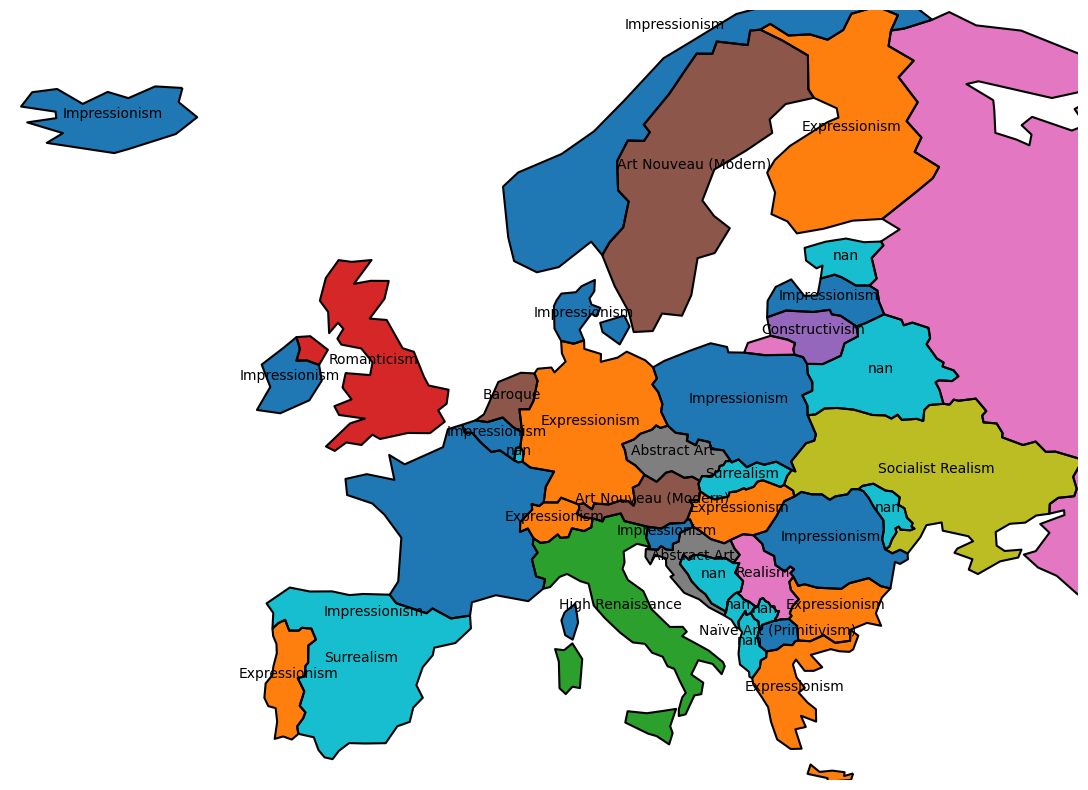

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have a GeoDataFrame named 'europe' with a 'style_color' column
# containing the RGBA values for each country's style

# Generate a random colormap with red-blue colors
cmap = sns.color_palette("RdBu", n_colors=len(europe["style"].unique()))

# Shuffle the colormap to ensure random assignment to styles
np.random.shuffle(cmap)

# Map style names to colors
style_colors = dict(zip(europe["style"].unique(), cmap))

# Map style names to their corresponding color in the DataFrame
europe["style_color"] = europe["style"].map(style_colors)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the boundaries
europe.boundary.plot(ax=ax, color='black')

# Plot the countries, colored by style_color
europe.plot(column='style_color', ax=ax, legend=False)

# Annotate the countries with their style
europe.apply(lambda x: ax.annotate(text=x.style, xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

# Set x and y limits to zoom in on Europe
ax.set_xlim(-25, 40)
ax.set_ylim(35, 70)

#Turn off the axis
ax.axis('off')


plt.show()


Another coloring for the countries:

*Note:* GeoPandas has a bug with the colorbar, and workarounds are limited, see [here](https://stackoverflow.com/a/71978018/19626271). I tried, but did not manage to change the colors to what I wished them to be for each country.

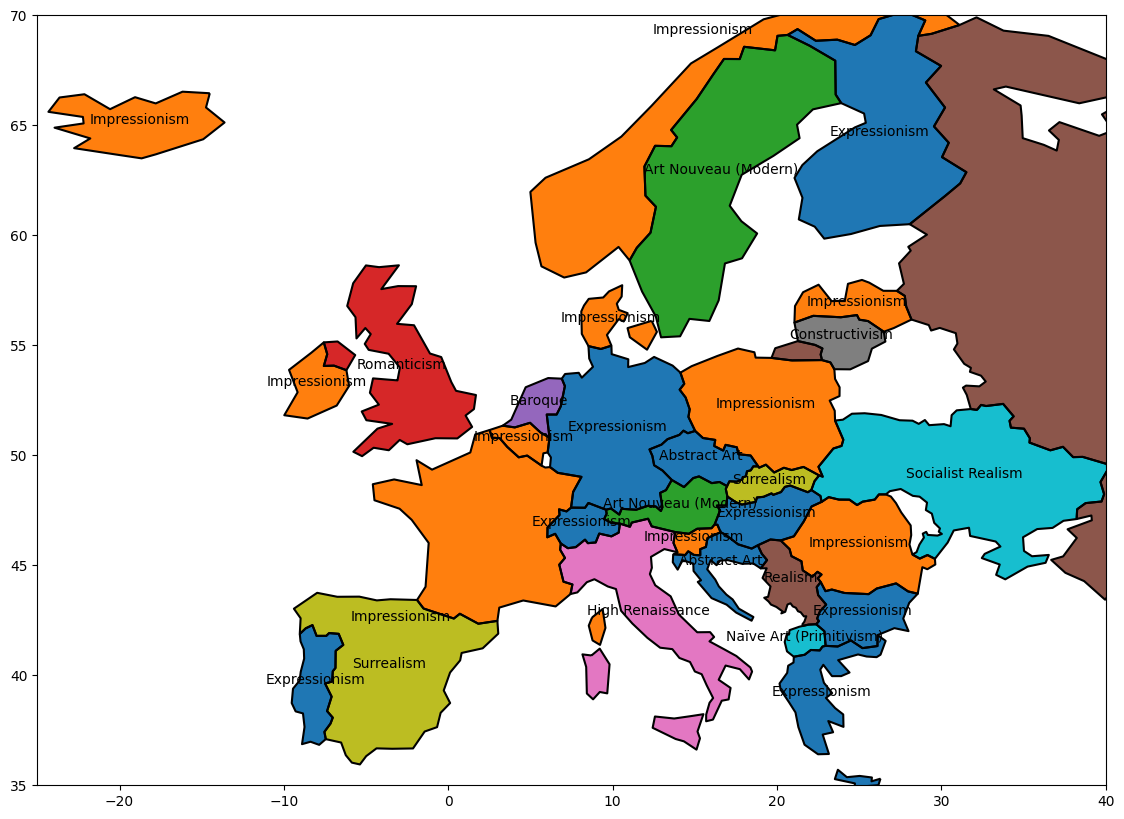